In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,10)

**Идея бустинга** заключается в последовательном создании композиции из базовых алгоритмов: каждый новый алгоритм строится с учётом информации, полученной от предыдущих, и направлен на исправление их ошибок. Цель состоит в обучении функции $F$, минимизирующей ожидаемое значение функции потерь $L(F) = E(L(y, F(x)))$. В качестве функции потерь можно использовать квадратичную функцию $\frac{1}{2}(y - F(x))^2$.

Процесс простого бустинга итеративно формирует последовательность приближений $F_t$: $t = 0, 1, \ldots$ жадным методом. $F_t$ получается из предыдущего приближения $F_{t-1}$ аддитивным способом: $F_t = F_{t-1} + h_t$, где $h_t$ — это базовый алгоритм, чаще всего неглубокое регрессионное дерево, обученное на остатках, то есть на разнице между фактическим значением зависимой переменной $y$ и приближением на предыдущем шаге $F_{t-1}$. Проще говоря, приближение $F_t$ — это постоянно обновляемый прогноз, который в конечном итоге должен максимально соответствовать фактическому значению зависимой переменной. Начальное приближение $F_0$ обычно является константным прогнозом.

Дерево решений используется в качестве базового алгоритма по следующим причинам:

- способно моделировать сложные нелинейные зависимости;
- чувствительно к изменению выборки и количеству используемых признаков, что приводит к разнообразию деревьев и улучшению качества композиции;
- неглубокие деревья, используемые в бустинге, являются слабыми алгоритмами (использование сильных алгоритмов в бустинге бессмысленно, так как они быстро переобучаются, и добавление каждой новой функции становится бесполезным).


# Бустинг

Рассматрим задачу регрессии с квадратичной функцией потерь:

$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min$


Будем строить композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Предсказание 1 модели на j-ом объекте на 5 больше, чем нужно.
$y_j = b_1(x_j) - 5$

Обучим вторую модель предсказывать ошибки первой модели
$b_1(x_j) + b_2(x_j) = (y_j + 5) + (-5) = y_j$


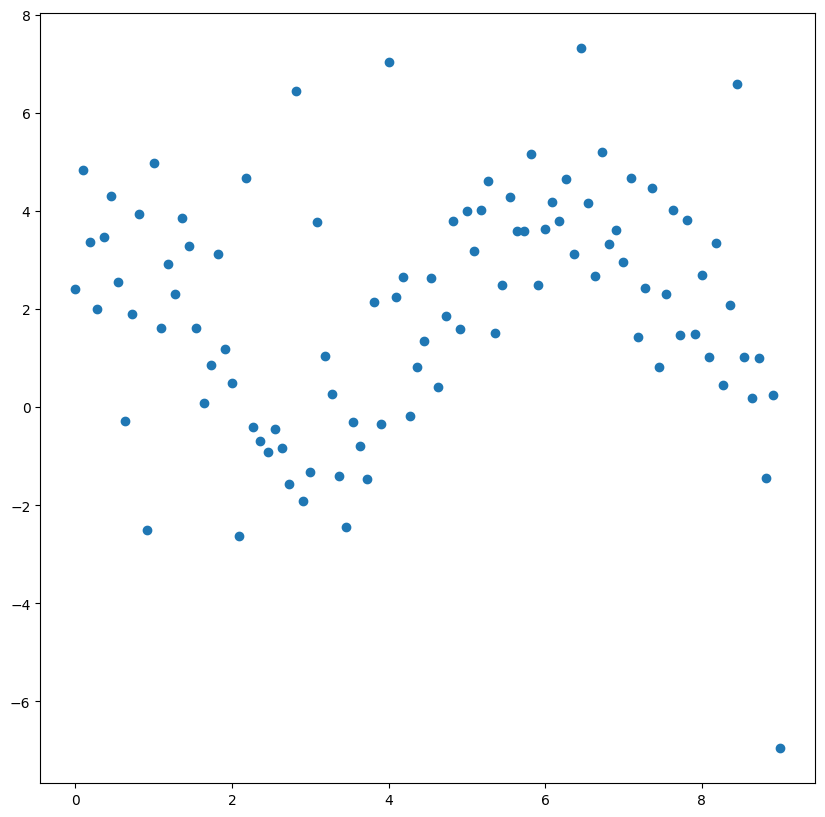

In [3]:
X = np.linspace(0, 9, 100)
y = 2 * np.cos(X) + 4 * np.random.rand(*X.shape)

ridx = np.random.randint(0, len(X), 15)
y_true_at_random_points = y[ridx].copy()
y[ridx] = np.random.rand(len(ridx)) * 15 - 7.5

X = X.reshape(-1, 1)

plt.scatter(X.ravel(), y)

In [4]:
model_1 = DecisionTreeRegressor(max_depth=1)
model_1.fit(X, y)
pred1 = model_1.predict(X)

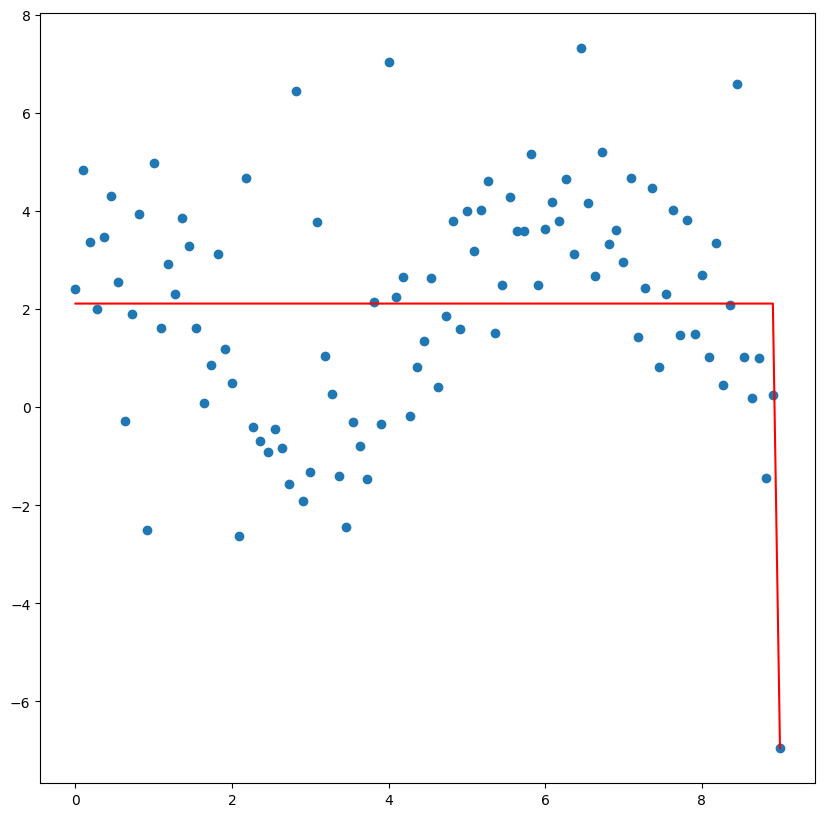

In [5]:
plt.scatter(X, y)
plt.plot(X, pred1, c="r")

In [6]:
y1 = y - pred1
y1

array([ 0.29075706,  2.7186411 ,  1.2606889 , -0.12003655,  1.34690549,
        2.19248103,  0.44807418, -2.39469371, -0.20294863,  1.82110927,
       -4.62005519,  2.87022861, -0.50421204,  0.80312008,  0.18888898,
        1.75270318,  1.17150816, -0.48789769, -2.0240775 , -1.26085148,
        1.01466014, -0.93514684, -1.62917451, -4.73679534,  2.5623917 ,
       -2.52368627, -2.79646185, -3.02032303, -2.56480898, -2.93626383,
       -3.68037663,  4.32663908, -4.02485997, -3.42529596,  1.65975272,
       -1.07313728, -1.84625388, -3.51005679, -4.55400383, -2.4047755 ,
       -2.90876288, -3.58320144,  0.03844167, -2.44799261,  4.91455207,
        0.14316251,  0.54349518, -2.28256261, -1.29271122, -0.77076716,
        0.53080057, -1.7069149 , -0.25391112,  1.67455994, -0.51108258,
        1.88980272,  1.06463817,  1.90413453,  2.49440356, -0.59218799,
        0.38735715,  2.17289227,  1.46927093,  1.48921624,  3.05175616,
        0.38219292,  1.51438574,  2.06541777,  1.67804895,  2.53

Обучим новое дерево на тех же признаках, но таргетом будет ошибка предыдущего алгоритма

In [7]:
model_2 = DecisionTreeRegressor(max_depth=1)
model_2.fit(X, y1)
pred2 = model_2.predict(X)

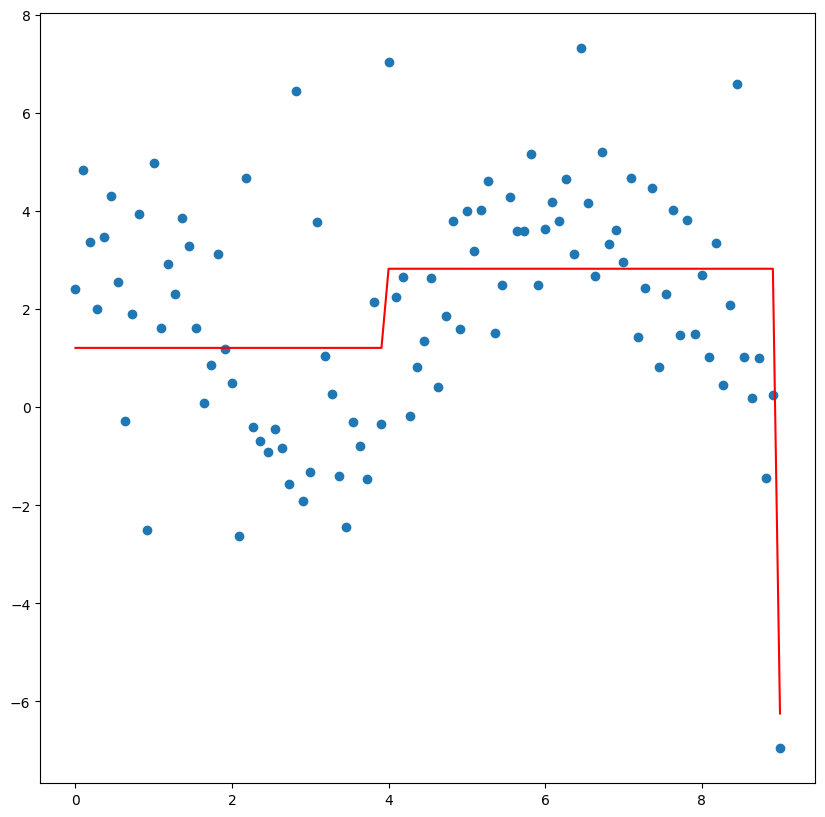

In [8]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2, c="r")

In [9]:
y2 = y1 - pred2
y2

array([ 1.19414704,  3.62203107,  2.16407887,  0.78335343,  2.25029547,
        3.09587101,  1.35146415, -1.49130374,  0.70044135,  2.72449924,
       -3.71666521,  3.77361858,  0.39917794,  1.70651005,  1.09227895,
        2.65609315,  2.07489813,  0.41549229, -1.12068753, -0.3574615 ,
        1.91805011, -0.03175687, -0.72578453, -3.83340536,  3.46578167,
       -1.62029629, -1.89307187, -2.11693306, -1.661419  , -2.03287386,
       -2.77698666,  5.23002906, -3.12147   , -2.52190599,  2.56314269,
       -0.1697473 , -0.9428639 , -2.60666681, -3.65061386, -1.50138553,
       -2.00537291, -2.67981147,  0.94183164, -1.54460263,  4.20474566,
       -0.5666439 , -0.16631123, -2.99236902, -2.00251763, -1.48057357,
       -0.17900584, -2.41672131, -0.96371752,  0.96475353, -1.22088899,
        1.17999631,  0.35483176,  1.19432812,  1.78459715, -1.3019944 ,
       -0.32244926,  1.46308586,  0.75946452,  0.77940983,  2.34194975,
       -0.32761349,  0.80457933,  1.35561136,  0.96824255,  1.82

In [10]:
model_3 = DecisionTreeRegressor(max_depth=1)
model_3.fit(X, y2)
pred3 = model_3.predict(X)

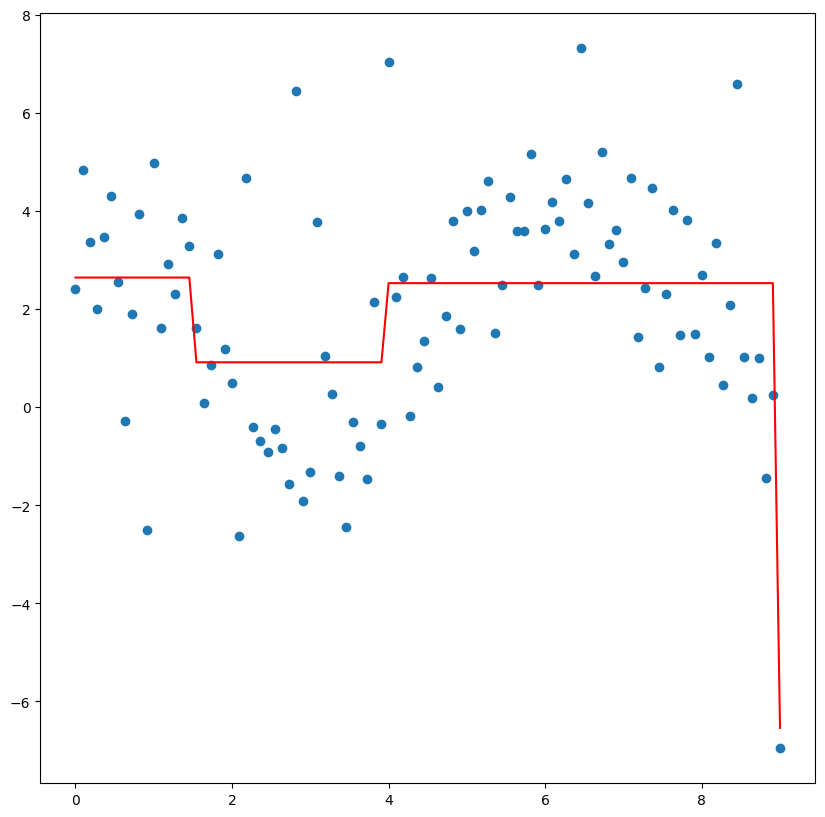

In [11]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2 + pred3, c="r")

**Почему же бустинг градиентый?**.

Функция потерь:  
$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min $

Строим композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Строим 1 модель:
$b_1(x) = \arg\min (L(y, b(x)))$

Ошибки 1 модели:
$s^1 = y_i - b_1(x_i)$

Строим 2 модель:
$b_2(x) = \arg\min (L(s^1, b(x)))$

Для k объекта:
$s_i^k = y_i - b_k(x_i) = -\nabla L(y_i, b_k(x_i))$

